# 5.Support Vector Machine

## 5.1 선형 SVM 

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 넓이
y = (iris["target"] == 2).astype(np.float64) # Iris - Virginica

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge")),
])

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
# SVC(kernel = "linear", C = 1)과 같이 SVC모델을 사용할 수 있으나, 큰 훈련세트에서는 속도가 느리므로 권장하지 않습니다.
# 또한 SGDClassifier(loss = "hinge", alpha = 1/(m*C))와 같이 모델을 사용할 수 있습니다. (m은 샘플 수)


## 5.2 비선형 SVM

비선형 데이터를 다루는 방법 중 하나는 다항 특성을 추가하는 것이다.

다항 특성을 추가하여 차원을 늘림으로써 선형으로 구분할 수 있게 된다.

In [9]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),    # 전에 사용했던 polynomial을 사용하여 다차항으로 만들어 준다.
    ("scaler", StandardScaler()),                         # LinearSVC는 StandardScaler를 사용해주어야 제대로 된 성능이 나온다.
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])

polynomial_svm_clf.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

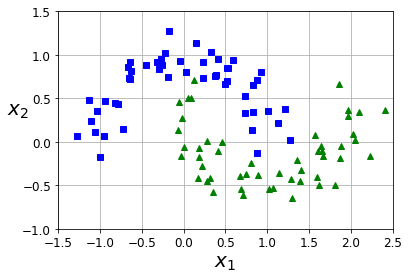

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


### 5.2.1 다항식 커널

다항식을 만드는 것은 쉬운 일이지만, 낮은 차수의 다항식은 데이터를 잘 표현하지 못하고(매우 복잡한 경우),

높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만든다.

이를 해결하기 위해 커널 트릭이란 것을 사용한다.

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [17]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

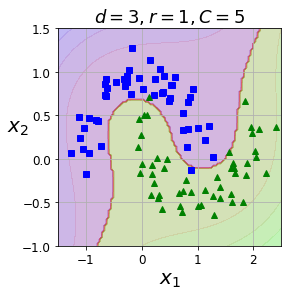

In [19]:
plt.figure(figsize=(4, 4))

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.show()

### 5.2.2 유사도 특성 추가

랜드마크를 설정하여 샘플이 랜드마크와 얼마나 닮았는지를 유사도 함수로 측정한다.

모든 샘플을 랜드마크로 설정하여 모든 유사도를 구한다면, 차원이 매우 커지기 때문에 선형적으로 구분할 가능성이 높다

### 5.2.3 가우시안 RBF 커널

유사도 특성 방식을 사용하는 것은 다항 특성 방식을 사용하는 것 만큼이나 머신러닝에서 자주 이용된다.

하지만 추카 특성을 모두 계산하려면 연산이 많아진다.

이를 커널 트릭을 사용하여 실제로 특성을 추가하진 않지만, 많은 유사도 특성을 추가한 것과 같은 성능을 낸다.

In [20]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

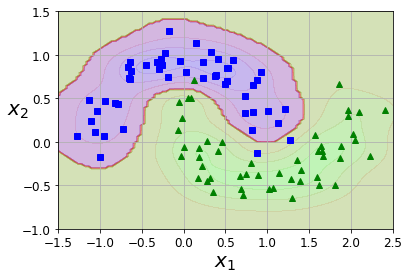

In [21]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 5.2.4 계산 복잡도

LinearSVC의 경우, 시간 복잡도는 O(m*n)입니다.

하지만 LinearSVC는 커널트릭을 지원하지 않습니다.

커널트릭을 지원하는 알고리즘을 기반으로한 SVC는 $ O(m^2*n) $ ~ $ O(m^3*n) $의 시간 복잡도를 가집니다.

하지만 이는 샘플 수가 커지면 커질수록 시간이 기하급수적으로 늘어납니다.

## 5.3 SVM 회귀

SVM을 회귀 문제에도 사용할 수 있습니다.

Decision Boundary를 기준으로 양쪽에 경계를 두는데, 두 경계 사이에 샘플들을 위치하게 합니다.

잘 모르겟습니다. 왜 그러는 걸까요?

In [22]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [29]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## 5.4 SVM 이론